### Summarizing data with PCA

This activity is meant to explore the results of applying PCA to a dataset.  Below, a dataset from a credit card company is loaded and displayed.  This dataset contains customer data pertaining to demographic and payment information as well as basic demographics.  The final column `default payment next month` is what we want to create profiles for.  

You are to use PCA and reduce the dimensionality of the data to 2 and 3 dimensions.  Then, draw scatterplots of the resulting data and color them by `default`.  Does it seem that 2 or 3 principal components will seperate the data into clear groups?  Why or why not?  You should post your visualizations and argument for whether the components offer more succinct data representations on the discussion board for this activity.  (Note: In this assignment you should use the sklearn version of `PCA`.)

In [14]:
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [15]:
default = pd.read_csv('data/credit.csv', index_col=0)

In [16]:
default.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   30000 no

In [17]:
default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [18]:
default.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [19]:
#Verify data is clean : 
default.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [42]:
#Create data frame to remove dependent variable from dataframe to post process ("default.payment.next.month")
data = default.iloc[:, 0:23]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AMT4   

In [43]:
#Conduct the PCA exercise 
#default_scaled = default - default.mean() / default.std() 

#Use method to list the actual column name for principle componets in data set (reference : )

scaler = StandardScaler()

data_scaled = data.copy()

#Create scaled version of DataFrame 
data_scaled=pd.DataFrame(scaler.fit_transform(data_scaled), columns=data_scaled.columns)

(30000, 2)
[0.28448215 0.17818817]
Cumlitive Variance Explained for 2 Component Analysis:  [0.28448215 0.46267032]
(30000, 3)
[0.28448215 0.17818817 0.06743273]
Cumlitive Variance Explained for 3 Component Analysis:  [0.28448215 0.46267031 0.53010304]


Text(0.5, 0, 'PC3')

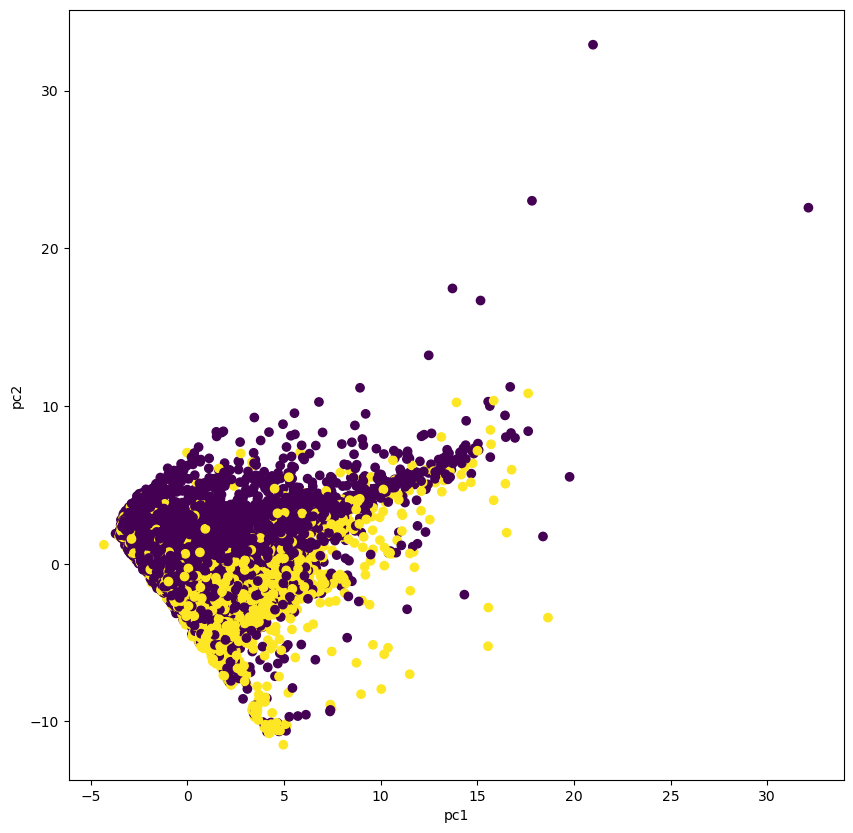

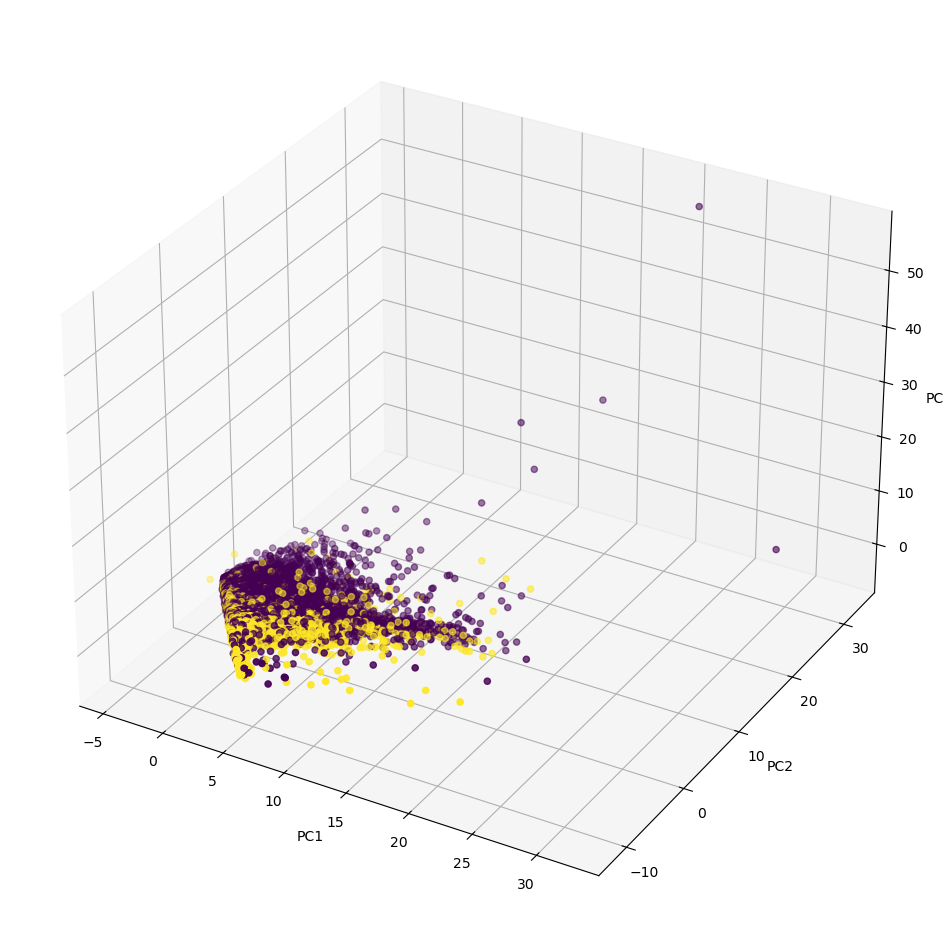

In [45]:
#PCA with 2 Components Analysis : Draw a 2D plot with 2 of the Principle components 
#Reference for PCA Analysis : https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/ 

#PCA 2 Component Analysis 
pca2 = PCA(n_components=2)
pca_fit2c = pca2.fit(data_scaled)
x2c = pca_fit2c.transform(data_scaled)

print(x2c.shape)
pca_fit2c.components_
print(pca_fit2c.explained_variance_ratio_)
cumulitive_variance_explained_2c = np.cumsum(pca_fit2c.explained_variance_ratio_)
print("Cumlitive Variance Explained for 2 Component Analysis: ", cumulitive_variance_explained_2c)

#PCA 2-D Plot of 2 features 
# Statement: With 2 components for PCA, there is not sufficient seperation and results in a cumulitive variance explained of 46% 
# 
plt.figure(figsize=(10,10))
plt.scatter(x2c[:, 0], x2c[:, 1], c=default['default.payment.next.month'])
plt.xlabel('pc1')
plt.ylabel('pc2')

#PCA 3 Component Analhysis 
pca3 = PCA(n_components=3)
pca_fit3c = pca3.fit(data_scaled)
x3c = pca_fit3c.transform(data_scaled)

print(x3c.shape)
pca_fit3c.components_
print(pca_fit3c.explained_variance_ratio_)
cumulitive_variance_explained_3c = np.cumsum(pca_fit3c.explained_variance_ratio_)
print("Cumlitive Variance Explained for 3 Component Analysis: ", cumulitive_variance_explained_3c)

#PCA 3-D Plot of 3 Component Analysis 
# Statement: With 3 components for PCA, there is not sufficient seperation and results in a cumulitive variance explained of 53%
# 
fig = plt.figure(figsize=(12,12))
axis = fig.add_subplot(111, projection='3d')

axis.scatter(x3c[:, 0], x3c[:, 1], x3c[:,2], c=default['default.payment.next.month'])
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)


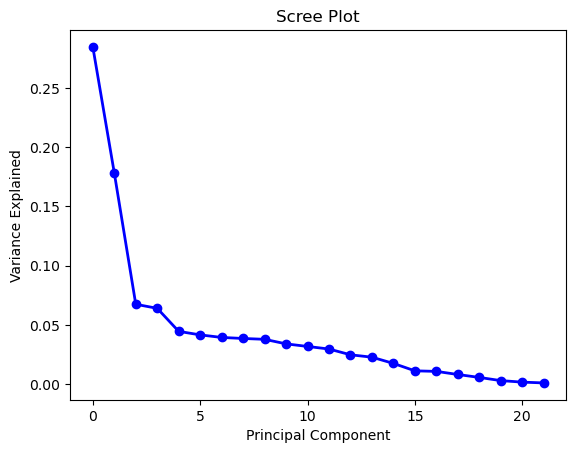

[0.28448215 0.17818817 0.06743307 0.06401154 0.04457556 0.04161737
 0.03946035 0.03859201 0.03788041 0.03404042 0.03186036 0.02968788
 0.02482385 0.02279956 0.01754959 0.01129943 0.01083167 0.00820396
 0.00572984 0.00305025 0.00177324 0.00109979]


In [48]:

pca = PCA(n_components=22)
pca_fit = pca.fit(data_scaled)

#print(type(default_scaled))
PC_values = np.arange(pca.n_components_)
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

print(pca.explained_variance_ratio_)
#print(pca.explained_variance_ratio_.sum())
#print(pca.feature_names_in_)

In [50]:
#Review cumulitive variance explained calculation to review actual values for Scree Plot data above
# At 13 principal components you will retain  90% of explained vareiance 
print(pca.explained_variance_ratio_)
cumulitive_variance_explained = np.cumsum(pca.explained_variance_ratio_)
print("Cumlitive Variance Explained for 22 Component Analysis: " + "\n" , cumulitive_variance_explained)

num_components_90per=0

for index in range(len(cumulitive_variance_explained)):
    value = cumulitive_variance_explained[index] 
    #print(value)
    if (value < 0.92):
        num_components_90per=num_components_90per+1

print("Number of Principle components to get 90% is:   ", num_components_90per)

[0.28448215 0.17818817 0.06743307 0.06401154 0.04457556 0.04161737
 0.03946035 0.03859201 0.03788041 0.03404042 0.03186036 0.02968788
 0.02482385 0.02279956 0.01754959 0.01129943 0.01083167 0.00820396
 0.00572984 0.00305025 0.00177324 0.00109979]
Cumlitive Variance Explained for 22 Component Analysis: 
 [0.28448215 0.46267032 0.53010339 0.59411493 0.63869049 0.68030786
 0.71976821 0.75836022 0.79624063 0.83028105 0.8621414  0.89182928
 0.91665313 0.93945269 0.95700228 0.96830172 0.97913339 0.98733735
 0.99306718 0.99611743 0.99789068 0.99899047]
Number of Principle components to get 90% is:    13


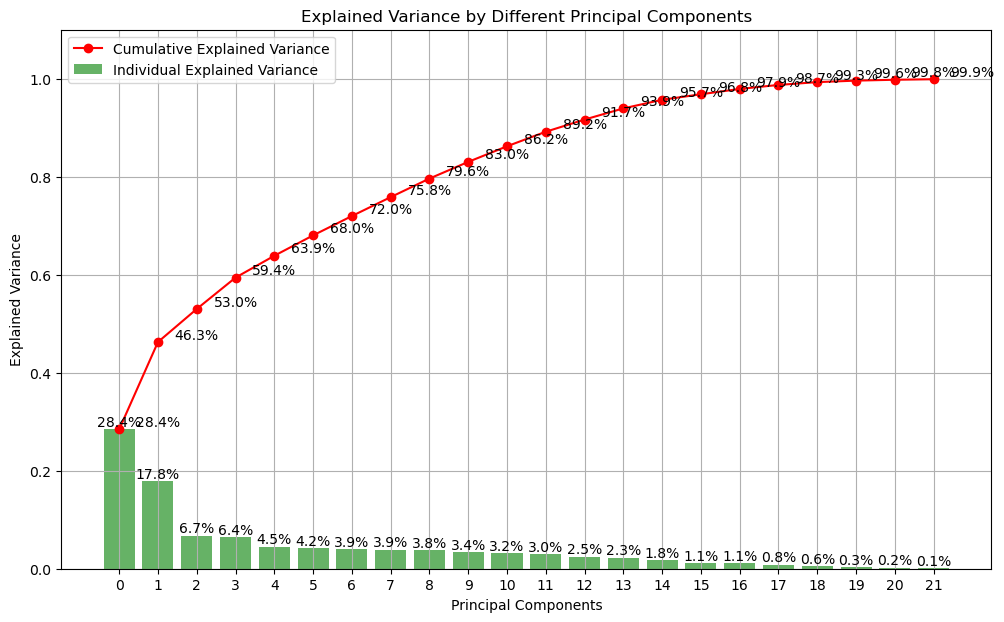

In [52]:
# Create the bar plot for individual variances
# Reference Medium Blog Article for code reuse for problem: https://medium.com/@megha.natarajan/understanding-cumulative-explained-variance-in-pca-with-python-653e3592a77c
plt.figure(figsize=(12, 7))
bar = plt.bar(range(0, 22), pca.explained_variance_ratio_, alpha=0.6, color='g', label='Individual Explained Variance')

# Create the line plot for cumulative variance
line = plt.plot(cumulitive_variance_explained, marker='o', linestyle='-', color='r', 
                label='Cumulative Explained Variance')

# Adding percentage values on top of bars and dots
for i, (bar, cum_val) in enumerate(zip(bar, cumulitive_variance_explained)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pca.explained_variance_ratio_[i]*100:.1f}%', 
             ha='center', va='bottom')
    plt.text(i+1, cum_val, f'{cum_val*100:.1f}%', ha='center', va='bottom')

# Aesthetics for the plot
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.xticks(range(0, 22))
plt.legend(loc='upper left')
plt.ylim(0, 1.1)  # extend y-axis limit to accommodate text labels
plt.grid(True)
plt.show()